In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [40]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)

In [41]:
X.shape

(500, 2)

In [42]:
y.shape

(500,)

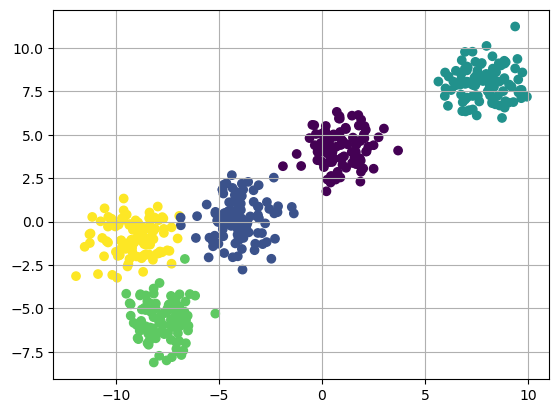

In [43]:
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c = y)

In [44]:
(np.random.random(X.shape[1])*2 -1) *10

array([ 9.01333259, -4.37454729])

## Defining the Clusters Dictionary

In [45]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters ={}

for i in range(k):
    center = (np.random.random(X.shape[1])*2 -1) *10
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : colors[i]
    }
    clusters[i] = cluster

In [46]:
clusters

{0: {'center': array([-4.28692815,  2.19376713]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 1.56057191, -4.7288771 ]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-9.33547991,  7.40961364]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-4.77928312,  4.00634989]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([0.64465318, 6.77344358]), 'points': [], 'color': 'red'}}

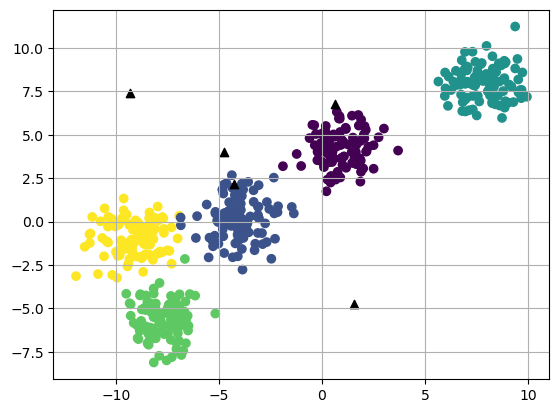

In [47]:
plt.grid(True)
plt.scatter(X[:,0], X[:,1], c = y)
for i in clusters:
    cl_x, cl_y = clusters[i]['center']
    plt.scatter(cl_x, cl_y, marker = '^', c ='black' )

## Distance Function

In [48]:
def distance(v1, v2):
    return np.sqrt(np.sum((v2-v1) ** 2))

In [49]:
distance(np.array([1,2]),np.array([3,1]))

2.23606797749979

## K- Step and M-Step

In [52]:
def assign_clusters():
    for i in range(X.shape[0]):
        dist = []
        curr_x = X[i]
        
        for i in range(k):
            cur_dis = distance(curr_x, clusters[i]['center'])
            dist.append(cur_dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        

def update_clusters():
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis = 0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
        
def plot_clusters():
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        try :
            plt.scatter(pts[:, 0], pts[:, -1], c = clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], marker = '^', c = 'black')

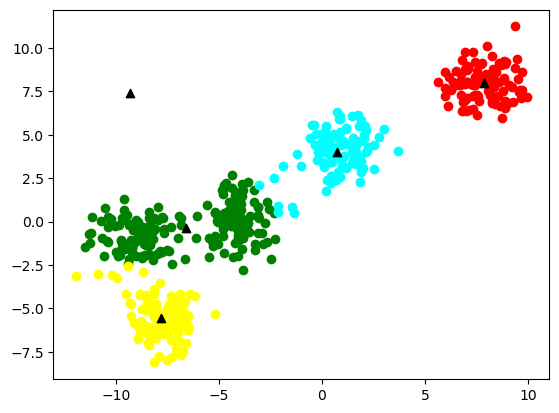

In [84]:
assign_clusters()
plot_clusters()
update_clusters()

In [18]:
clusters

{0: {'center': array([-2.06204304,  6.57693285]),
  'points': [array([7.44598269, 9.20313614]),
   array([1.87879015, 3.51452443]),
   array([1.46173901, 3.38024741]),
   array([-0.22816528,  3.53653954]),
   array([0.34123054, 4.31357332]),
   array([0.42745643, 2.61640063]),
   array([0.14207575, 4.19267027]),
   array([0.99185358, 3.27429903]),
   array([1.66378785, 3.60258303]),
   array([0.49931013, 3.97388479]),
   array([0.29993225, 4.89442219]),
   array([-0.2979067 ,  5.04757883]),
   array([1.16890375, 3.09876118]),
   array([-0.37980545,  5.55461936]),
   array([0.8614512 , 5.93258376]),
   array([2.12414555, 5.28234711]),
   array([0.05596187, 4.54025169]),
   array([0.42487931, 3.64653908]),
   array([2.2494291 , 4.31194285]),
   array([2.74537548, 4.85700872]),
   array([2.16322284, 4.0527273 ]),
   array([0.65968729, 2.41981542]),
   array([1.66102004, 4.47601683]),
   array([0.33774537, 4.58939153]),
   array([5.64814745, 8.0676723 ]),
   array([1.01840221, 4.58759217])

## from sklearn k-means

In [87]:
from sklearn.cluster import KMeans

In [88]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)

In [89]:
X.shape

(500, 2)

In [90]:
km = KMeans(n_clusters = 5)

In [91]:
km.fit(X,y)

C:\Users\jaius\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jaius\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [94]:
cluster_centers = km.cluster_centers_

In [95]:
labels = km.labels_

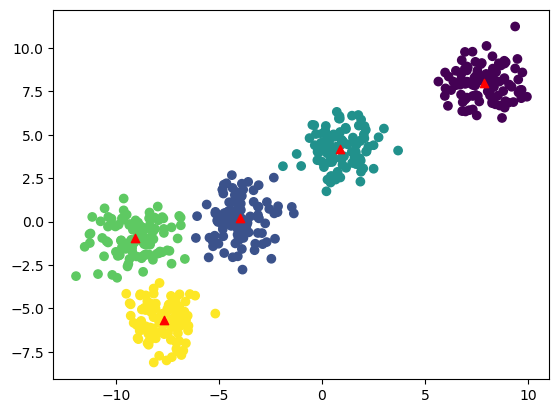

In [98]:
plt.scatter(X[:,0], X[:,-1], c = labels)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c = 'red', marker ='^')